In [3]:
import numpy as np
import os
import h5py

import mspt.image_processing as img
import mspt.particle_detection as detect
import mspt.particle_fitting1 as fit
os.environ['NUMEXPR_MAX_THREADS'] = '32'
%matplotlib notebook

# Process movie for display

## Select movie to process

In [4]:
#file = os.path.normpath(r'C:\Users\admin\Desktop\MSPT test\0001_sample.mp') # set manually
file = img.fileDialog(os.getcwd()) # or via dialog
assert os.path.isfile(file), 'File "{}" does not exist'.format(file)

Loaded /Users/jamesmclean/Documents/Uni/Laidlaw/Ralf_Research/OGMSPT_data/001_sample.mp


## Parameter settings

In [5]:
# General parameters
frame_range = [0,10000] # Restrict analysis to certain frames, e.g. [0, 2000], only applied if all_frames = False
navg = 1 # Frame averaging before background removal
assert len(frame_range)==2 or len(frame_range)==0, 'frame_range is expected to be either of type [] or [int, int]'

# Background removal
mode = 'continuous_median' # Choose background removal strategy
window_length = 1001 # Set median window length

# Choose between CPU and GPU processing. Set one of the two options True and the other one False.
parallel = True # Use multiple CPU cores to perform background substraction
GPU = False # Use GPU to perform background substraction, fastest option (requires CUDA and pytorch)

## Background removal

In [6]:
# Apply continuous median background removal
frames, file = img.mp_reader(batch_mode=True,
                             file_to_load=file,
                             frame_range=frame_range,
                             mode=mode,
                             navg=navg,
                             window_length=window_length,
                             parallel=parallel, 
                             GPU=GPU)

Loaded /Users/jamesmclean/Documents/Uni/Laidlaw/Ralf_Research/OGMSPT_data/001_sample.mp


Generating frames...:   0%|          | 0/10000 [00:00<?, ?frames/s]

# Alternatively, load processed movie for display

## Select processed movie to load

In [5]:
#file = os.path.normpath(r'C:\Users\admin\Desktop\MSPT test\001_sample_median1001.h5') # set manually
file = img.fileDialog(os.getcwd()) # or via dialog
assert os.path.isfile(file), 'File "{}" does not exist'.format(file)

# Load processed movies from HDF5 file
with h5py.File(file, 'r') as h5_file:
    frames = np.asarray(h5_file['frames']).copy()
    window_length = np.asarray(h5_file['window_length']).copy()
    frame_range = np.asarray(h5_file['frame_range']).copy()
    
print('Loaded processed movie {}'.format(file))

Loaded /Users/jamesmclean/Downloads/001_sample_median1001 copy/001_sample_20240723_105852.h5
Loaded processed movie /Users/jamesmclean/Downloads/001_sample_median1001 copy/001_sample_20240723_105852.h5


# Movie viewer

## Basic viewer with frame slider

In [14]:
# Import the necessary libraries i added this 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
import IPython.display as display
%matplotlib inline 
# Example data: creating a 3D array to simulate frames
frames = np.random.rand(10, 512, 512)  # 10 frames of 512x512 images

# Function to display a single frame
def show_frame(frame_index, vmin, vmax):
    plt.figure(figsize=(9.5, 9.5*frames.shape[1]/frames.shape[2]))
    plt.imshow(frames[frame_index], cmap='gray', vmin=vmin, vmax=vmax)
    plt.axis('off')
    plt.show()

# Contrast range for display
contrast_range = [-0.01, 0.01]

# Create an interactive slider to browse through frames
interact(
    show_frame,
    frame_index=widgets.IntSlider(min=0, max=frames.shape[0]-1, step=1, value=0),
    vmin=widgets.FloatSlider(min=-0.01, max=0.01, step=0.0001, value=contrast_range[0]),
    vmax=widgets.FloatSlider(min=-0.01, max=0.01, step=0.0001, value=contrast_range[1])
);


interactive(children=(IntSlider(value=0, description='frame_index', max=9), FloatSlider(value=-0.01, descripti…

interactive(children=(IntSlider(value=0, description='frame', layout=Layout(width='90%'), max=9), Output()), _…

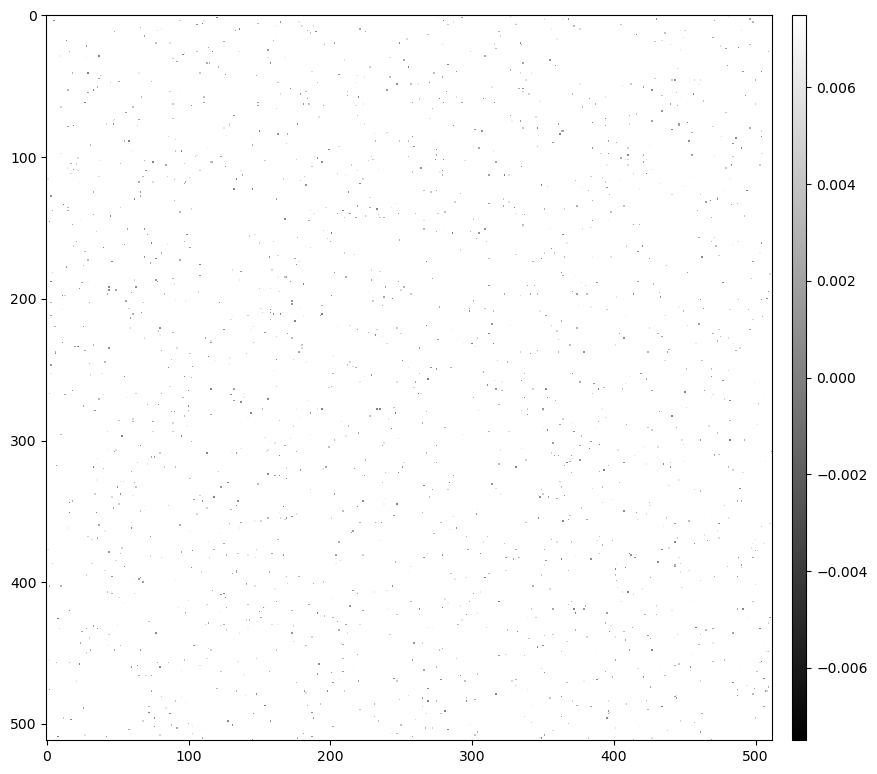

In [15]:
# Use this viewer to slide through frames
%matplotlib inline 
contrast_range = [-0.0075, 0.0075] # For display
img.frame_slider(frames, vmin=contrast_range[0], vmax=contrast_range[1], figsize=(9.5, 9.5*frames.shape[1]/frames.shape[2]))

## Viewer with frame slider and detection threshold selection

interactive(children=(IntSlider(value=0, description='frame', layout=Layout(width='90%'), max=9), SelectionSli…

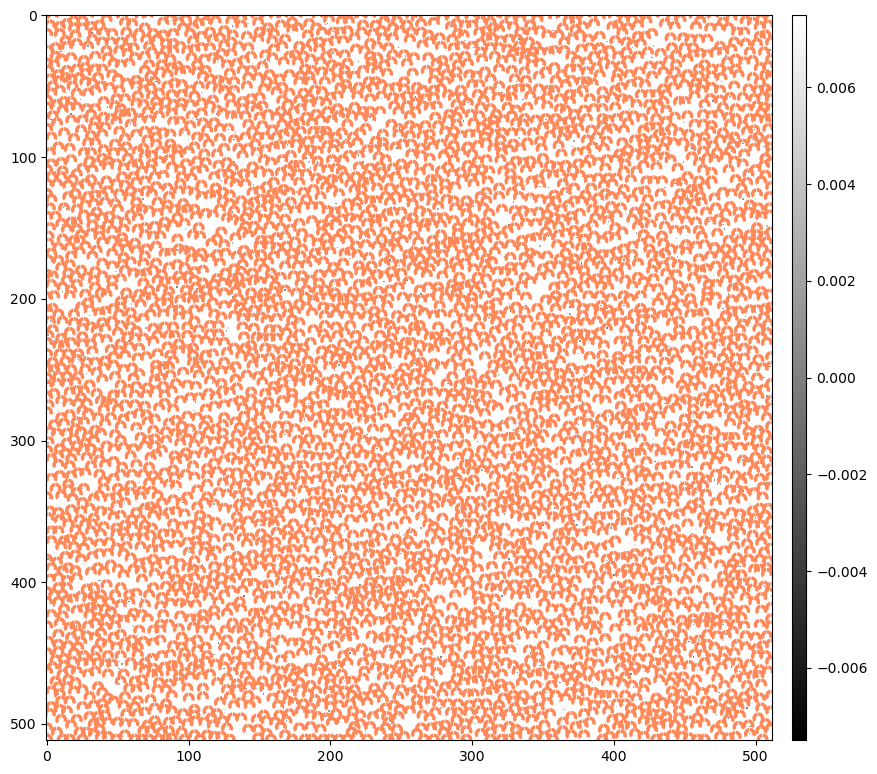

In [9]:
# Use this viewer to select a suitable particle detection threshold thresh
%matplotlib inline 
contrast_range = [-0.0075, 0.0075] # For display
detect.frame_slider_view_cands(frames,
                               vmin=contrast_range[0],
                               vmax=contrast_range[1],
                               figsize=(9.5, 9.5*frames.shape[1]/frames.shape[2]) )

## Viewer with frame slider, detection threshold selection and successful particle fits

interactive(children=(IntSlider(value=0, description='frame', layout=Layout(width='90%'), max=9), SelectionSli…

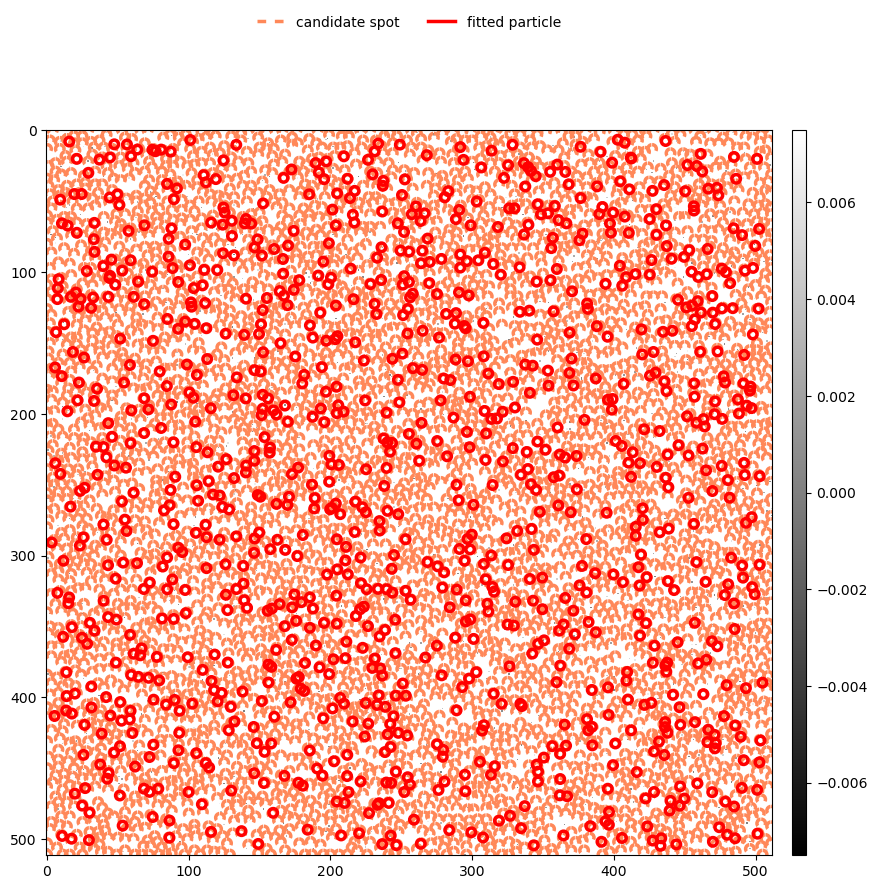

In [10]:
# Use this viewer to see successful particle fits
%matplotlib inline 
# NOTE: takes some time after first execution of cell and first slider update, but then it is smooth
contrast_range = [-0.0075, 0.0075] # For display
fit.frame_slider_view_cands_dets(frames,
                                 vmin=contrast_range[0],
                                 vmax=contrast_range[1],
                                 method='trust-ncg',
                                 DoG_estimates={'T' : 0.1423, 's' : 2.1436, 'sigma' : 1.2921},
                                 figsize=(9.5, 9.5*frames.shape[1]/frames.shape[2]) )

interactive(children=(IntSlider(value=0, description='frame', layout=Layout(width='90%'), max=9), SelectionSli…

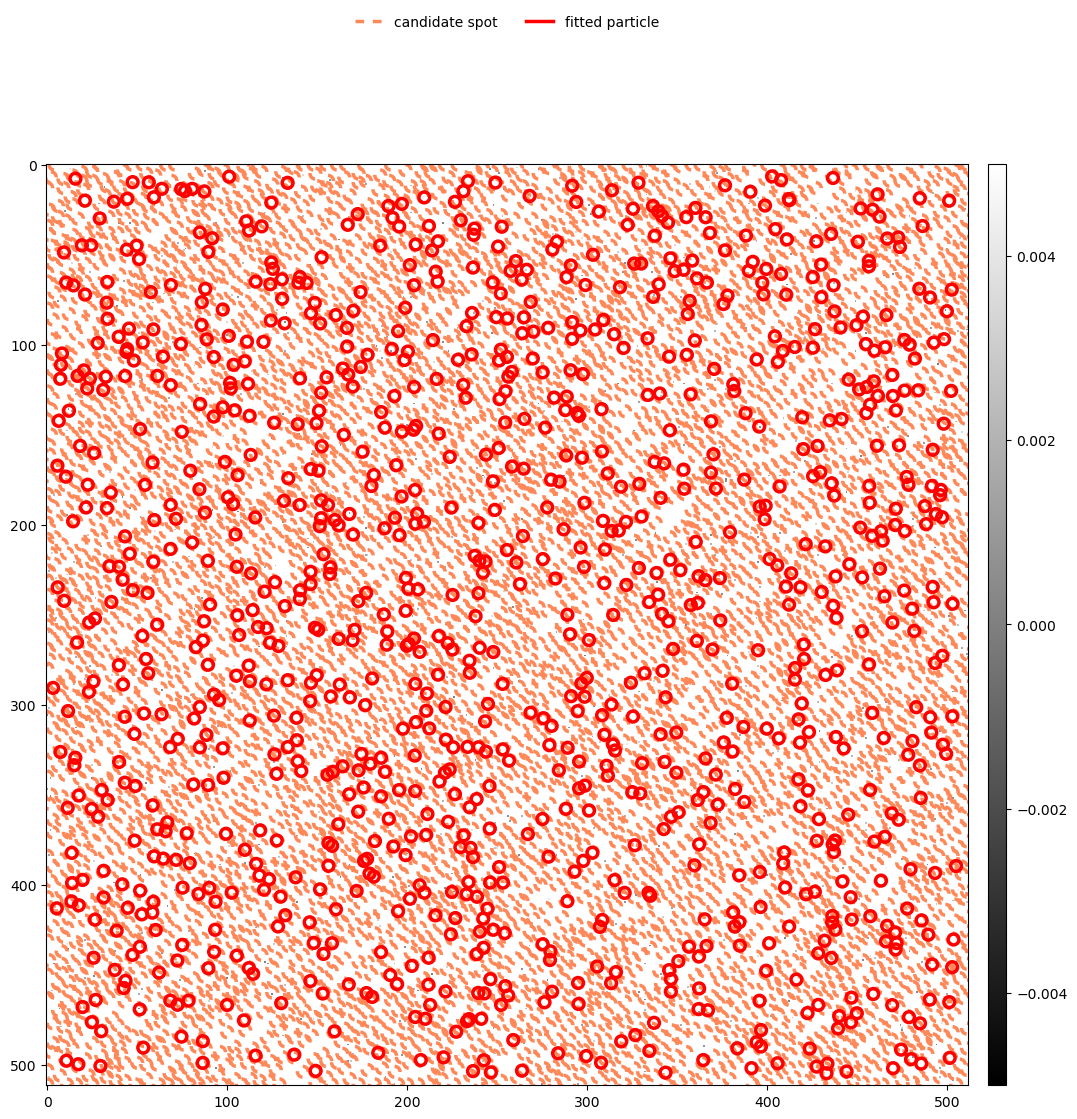

In [11]:
%matplotlib inline 
# NOTE: takes some time after first execution of cell and first slider update, but then it is smooth
contrast_range = [-0.005, 0.005]  # Adjusted contrast range for better display
figsize = (12, 12 * frames.shape[1] / frames.shape[2])  # Increased figure size for better visibility

# Function to view frame candidates and detections with adjustments
fit.frame_slider_view_cands_dets(frames,
                                 vmin=contrast_range[0],
                                 vmax=contrast_range[1],
                                 method='trust-ncg',
                                 DoG_estimates={'T': 0.1423, 's': 2.1436, 'sigma': 1.2921},
                                 figsize=figsize)
